**Question 4** Thinking geometrically.

Below, a dataset and its linear regression solution are provided. Let $c_1, c_2, c_3, c_4,$ and $c_5$ be the five columns in the feature matrix. Randomly sample five real values $u_1, u_2, u_3, u_4, u_5$ from a uniform distribution $(0, 1)$ and generate a new vector by using these values to linearly combine the aforementioned columns: $c = \sum_{i=1}^5 u_i c_i$. Calculate the inner product $c^\top (y-\hat{y})$, where $y$ is the training target vector and $\hat{y}$ is the predicted target vector. Why do you get such result?

Additionally, what is the value of $\hat{y}^\top (y-\hat{y})$? Explain why this value is what it is.

You may choose to verify your answer through coding. Note that very small values (e.g., $\leq 1e-10$) can be treated as zeros.


In [1]:
import numpy as np
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

M = 5
basis = np.arange(M+1)
X = x[:, np.newaxis]**basis[np.newaxis, :]

w = np.linalg.solve(X.T@X, X.T@y)
yhat = X.dot(w)
r = y-yhat

In [27]:
# Randomly sample 5 values u1, u2, ... , u5 from uniform distribution (0,1)

import random

u = []
for i in range(5):
    u.append(random.uniform(0,1))

# Add zero at first index of list
u.insert(0, 0)

In [30]:
au = np.array(u)

au

array([0.        , 0.35034436, 0.24700639, 0.42010421, 0.24274292,
       0.51647852])

In [19]:
X

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+00, -7.77777778e-01,  6.04938272e-01,
        -4.70507545e-01,  3.65950312e-01, -2.84628021e-01],
       [ 1.00000000e+00, -5.55555556e-01,  3.08641975e-01,
        -1.71467764e-01,  9.52598689e-02, -5.29221494e-02],
       [ 1.00000000e+00, -3.33333333e-01,  1.11111111e-01,
        -3.70370370e-02,  1.23456790e-02, -4.11522634e-03],
       [ 1.00000000e+00, -1.11111111e-01,  1.23456790e-02,
        -1.37174211e-03,  1.52415790e-04, -1.69350878e-05],
       [ 1.00000000e+00,  1.11111111e-01,  1.23456790e-02,
         1.37174211e-03,  1.52415790e-04,  1.69350878e-05],
       [ 1.00000000e+00,  3.33333333e-01,  1.11111111e-01,
         3.70370370e-02,  1.23456790e-02,  4.11522634e-03],
       [ 1.00000000e+00,  5.55555556e-01,  3.08641975e-01,
         1.71467764e-01,  9.52598689e-02,  5.29221494e-02],
       [ 1.00000000e+00,  7.77777778e-01,  6.049

In [47]:
# Column vector c

c = X@au
print(c.shape)
cT = c.T
print(cT.shape)             # np treats both as the same

print(c)

(10,)
(10,)
[-0.79717778 -0.37890105 -0.19464304 -0.10402431 -0.03642571  0.04259863
  0.16490827  0.39336343  0.85541198  1.77667639]


Calculate the inner product $c^\top (y-\hat{y})$

In [52]:
# Inner product

A = np.dot(c.T,r)
A

6.106226635438361e-16

- A: The inner product is approximately 0.

Inner product $\hat{y}^\top (y-\hat{y})$

In [56]:
# Inner product

B = np.dot(yhat.T,r)
B

-2.981555974335137e-15

- A: The inner product is approximately 0.

**Question 5** Investigating Solution Sensitivity.

1. Determine the solution using the Singular Value Decomposition (SVD) of the data matrix and the training target $y$. You must **not** use any pre-existing API for this task. Ensure that your computations avoid any matrix-matrix products. Your final solution should match the one obtained using `np.linalg.lstsq()`.

**Note:** The order of computations is crucial in matrix calculations as it can significantly affect computational costs.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,50)
# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)
print('y: ', y.shape)

M = 10
basis = np.arange(M+1)
X = x[:, np.newaxis]**basis[np.newaxis, :]

# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
U, S, VT = np.linalg.svd(X)
print('Singular vectors: ', U.shape)
print('Singular values: ', S.shape)
print('Eigen vectors: ', VT.shape)

def getbysvd():
  # TODO: Please fill the function to compute the linear regression solution
  # on dataset (X, y) which is already provided
  # the computation should NOT involve matrix-matrix product,
  # matrix-vector product is fine
  # and should NOT use any solution API like np.linalg.solve, etc.

  # Attempt 1:

  # A = U.T@y
  # print('A shape: ', A.shape)

  # identity = np.identity(11)

  # print(S)
  # S_matrix = identity*S
  # print('S matrix shape: ', S_matrix.shape)

  # inv = np.linalg.inv(S_matrix)
  # print('S inverse matrix shape: ', inv.shape)

  # B = inv@A
  # print(B)

  # theta = VT@B

  # Attempt 2:
  lst = [(U[:,i]@y)*VT[i,:]/S[i] for i  in range(M+1)]
  print(lst)

  theta = sum(lst)

  return theta

getbysvd()

theta = getbysvd()
thetabylstsq = np.linalg.lstsq(X, y)[0]

print('theta: \n', theta, '\nthetabylstsq: \n', thetabylstsq)

print("if your computation is correct, here should print out true :: ", np.allclose(theta, thetabylstsq))

y:  (50,)
Singular vectors:  (50, 50)
Singular values:  (11,)
Eigen vectors:  (11, 11)
[array([ 1.75777887e-02, -6.91635175e-18,  7.55097742e-03, -3.33250505e-18,
        5.21207005e-03, -2.99504924e-18,  4.11147876e-03, -2.73268257e-18,
        3.46072206e-03, -2.65241039e-18,  3.02818284e-03]), array([ 1.52982622e-16,  2.86999801e-01, -0.00000000e+00,  2.04162562e-01,
       -0.00000000e+00,  1.63531848e-01,  4.77575916e-17,  1.38906811e-01,
       -1.19393979e-17,  1.22272092e-01,  3.58181937e-17]), array([ 3.65574724e-02, -7.98894445e-18, -2.54025114e-02, -1.86153084e-18,
       -2.98653835e-02,  1.54843287e-18, -2.91893193e-02,  2.27903915e-18,
       -2.76941044e-02,  4.63488605e-18, -2.61782078e-02]), array([-1.94335615e-15,  1.33200732e+00,  9.34985335e-15, -2.04593505e-01,
        1.73950760e-15, -6.73634292e-01, -2.71798063e-15, -8.49785208e-01,
       -4.78364590e-15, -9.18557026e-01, -6.90367079e-15]), array([-1.29152497e-02, -3.91754803e-16,  6.01908660e-02,  7.67133866e-1

C:\Users\fuwen\AppData\Local\Temp\ipykernel_19084\1563540021.py:58: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  thetabylstsq = np.linalg.lstsq(X, y)[0]


2. There are various definitions of sensitivity. In this exercise, 'sensitivity' refers to the extent to which a model's output is perturbed when noise is added to the input. How does sensitivity change as regularization increases? Please visualize the change in sensitivity as regularization increases using a separate figure.

* A: The sensitivity (extent to which the model's output is perturbed) is decreased as regularisation increases (fitted has less perturbation from the true).

3. **Without using an additional regularization term**, can you identify another method to reduce sensitivity? Hint: Review the documentation for the `lstsq` function (doc: [numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq)). Please empirically test if this method works and explain why.

* A: The rcond optional parameter can be used to set a cut-off for small singular values of a, effectively ignoring them during the least squares computation process (lstsq).

4. **Relationship Between Sensitivity and Overfitting**:
   - Do you think reducing sensitivity can always reduce overfitting?
   - Conversely, do you think reducing overfitting can always reduce sensitivity?
   
   Please share your thoughts and reasoning on these questions.

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

# define a validation set
xv=np.linspace(-1,1,20)
yv=np.sin(2*pi*.5*xv)+0.4*np.random.randn(xv.size)

(10, 31)
(10, 31)
(10, 31)
(10, 31)
(10, 31)
(10, 31)


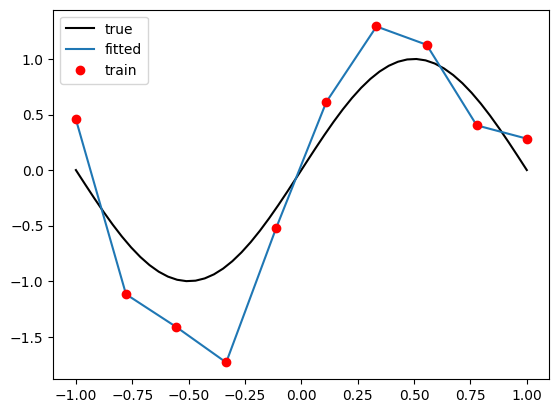

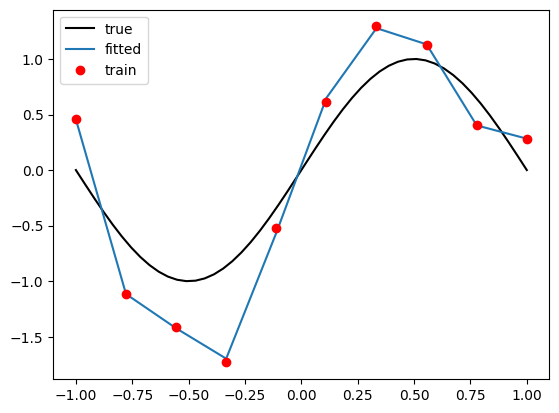

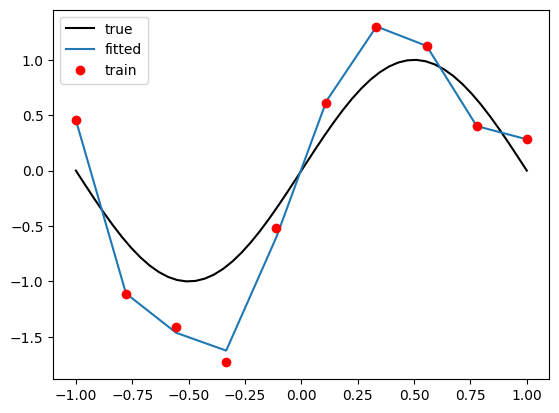

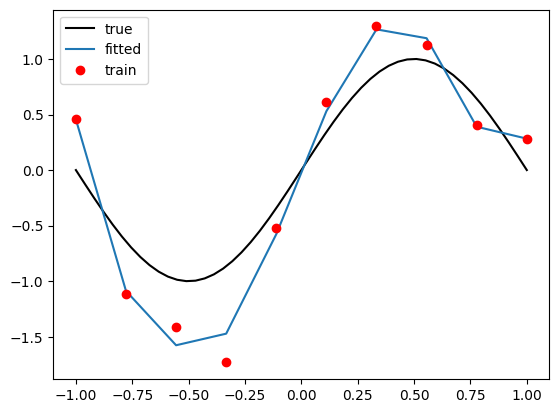

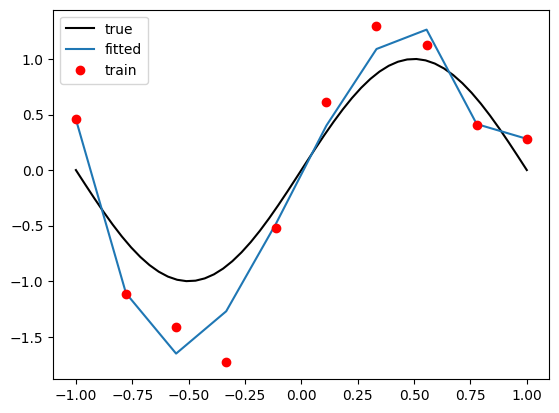

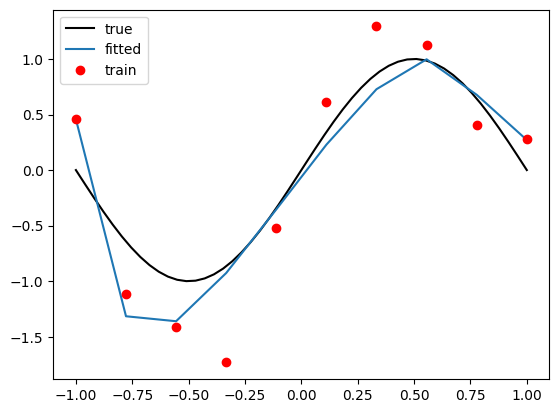

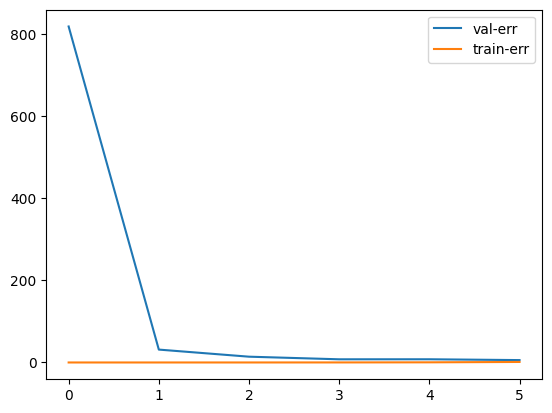

In [171]:
def get_sensi(theta, xtilde):
  yhat_orig = xtilde@theta
  yhat_p = (xtilde+np.random.normal(0., 0.2, xtilde.shape))@theta
  return np.linalg.norm(yhat_p-yhat_orig)/np.linalg.norm(yhat_orig)

# TODO: Use get_sensi

np.random.seed(0)
error_val= []
error_train = []
sensi = []

# try increasing number of basis
reglist = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
for reg in reglist:
  plt.figure()

  # always show the true function
  # plot the true function
  plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black', label='true')

  M = 30
  basis = np.arange(M+1)
  X = x[:, np.newaxis]**basis[np.newaxis, :]
  print(X.shape)

  theta = np.linalg.solve(X.T@X + reg*np.eye(X.shape[1]), X.T@y)
  # TODO: use lstsq
  yhat = X@theta
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
  yhat_val = Xv@theta
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

plt.figure()

plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

(10, 2)
(10, 11)
(10, 21)
(10, 31)
(10, 41)


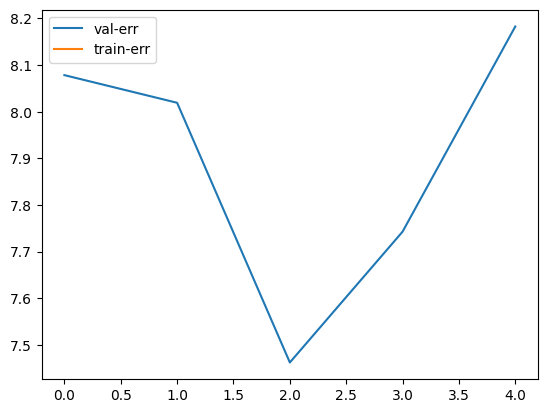

In [173]:
# TODO: add a plot to visualize how validation error changes as we increase basis

np.random.seed(0)
error_val= []
error_train = []
sensi = []

reg = 0.001
for M in [1, 10, 20, 30, 40]:
  basis = np.arange(M+1)
  X = x[:, np.newaxis]**basis[np.newaxis, :]
  print(X.shape)

  theta = np.linalg.solve(X.T@X + reg*np.eye(X.shape[1]), X.T@y)
  yhat = X@theta

  # compute val error
  Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
  yhat_val = Xv@theta
  error = np.sum((yv - yhat_val)**2)

  error_val.append(error)

plt.figure()

plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()